In [1]:
#import tools
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
#read txt data from web scrapper
df = pd.read_csv('fabia_ceny_log.txt',sep=',',header=None,engine='python',)


In [3]:
df.head()

,0,1,2,3,4,5
0,'2017','65 208 km','1 422 cm3','Diesel','35 900 PLN','(Mazowieckie)'
1,'2020','8 000 km','999 cm3','Benzyna','57 900 PLN','(Łódzkie)'
2,'2019','41 355 km','999 cm3','Benzyna+LPG','46 000 PLN','(Śląskie)'
3,'2017','30 587 km','999 cm3','Benzyna','46 000 PLN','(Śląskie)'
4,'2020','1 km','999 cm3','Benzyna','61 350 PLN','(Dolnośląskie)'


In [4]:
#rename columns
df.rename({0:'year',1:'mileage  (km)',2:'engine_capacity (cm3)',3:'fuel type',4:'price (PLN)',5:'location'}, axis=1, inplace=True)

In [5]:
df.head()

,year,mileage (km),engine_capacity (cm3),fuel type,price (PLN),location
0,'2017','65 208 km','1 422 cm3','Diesel','35 900 PLN','(Mazowieckie)'
1,'2020','8 000 km','999 cm3','Benzyna','57 900 PLN','(Łódzkie)'
2,'2019','41 355 km','999 cm3','Benzyna+LPG','46 000 PLN','(Śląskie)'
3,'2017','30 587 km','999 cm3','Benzyna','46 000 PLN','(Śląskie)'
4,'2020','1 km','999 cm3','Benzyna','61 350 PLN','(Dolnośląskie)'


In [6]:
#way to check empty columns
df.isnull().values.any()

True

In [7]:
df.dropna(axis=0,how='any',inplace=True)

In [8]:
#clean data from special sings and units, and also change data types 
import re
#df[:] = df.str.replace('\W', '')
df=df.replace("'","",regex=True)
df=df.replace(" ","",regex=True)
df['year']=df['year'].astype(int)
df['mileage  (km)'] = df['mileage  (km)'].replace("km","",regex=True).astype(int)
df['engine_capacity (cm3)'] = df['engine_capacity (cm3)'].replace('cm3','',regex=True).astype(int)
df['price (PLN)'] = df['price (PLN)'].replace('PLN','',regex=True)
df['price (PLN)'] = df['price (PLN)'].replace('EUR','',regex=True).astype(int)
df['location'] = df['location'].str.replace("(","")
df['location'] = df['location'].str.replace(")","")
df['fuel type'] = df['fuel type'].astype(str)
df['location'] = df['location'].astype(str)

# re.sub("[\(\[].*?[\)\]]", "", df['location'])

In [9]:
df.head()

,year,mileage (km),engine_capacity (cm3),fuel type,price (PLN),location
0,2017,65208,1422,Diesel,35900,Mazowieckie
1,2020,8000,999,Benzyna,57900,Łódzkie
2,2019,41355,999,Benzyna+LPG,46000,Śląskie
3,2017,30587,999,Benzyna,46000,Śląskie
4,2020,1,999,Benzyna,61350,Dolnośląskie


In [10]:
data = df.copy()

let's explore some data

In [11]:
data.describe()

,year,mileage (km),engine_capacity (cm3),price (PLN)
count,859.000000,859.000000,859.000000,8.590000e+02
mean,2018.629802,51240.738068,1051.563446,5.306687e+04
std,1.330246,56193.751591,134.583019,1.855036e+05
min,2017.000000,1.000000,998.000000,8.000000e+03
25%,2017.000000,7.500000,999.000000,3.190000e+04
50%,2019.000000,33000.000000,999.000000,4.290000e+04
75%,2020.000000,94513.000000,999.000000,5.770000e+04
max,2021.000000,242333.000000,1422.000000,3.973631e+06


In [12]:
data_gr = data.groupby(['location']).mean()
data_gr.sort_values(by=['price (PLN)','mileage  (km)'])
# Holandia is not a Voivodeship of Poland
# In the Wielkopolskie voivodship there is the lowest average price of a Skoda 
# but in average of mileage  is high
# Świętokrzyskie should be good place for looking for a Skoda Fabia :) 

,year,mileage (km),engine_capacity (cm3),price (PLN)
location,,,,
Holandia,2020.000000,1680.000000,999.000000,11131.000000
Wielkopolskie,2018.242105,67165.989474,1084.652632,39849.515789
Świętokrzyskie,2018.750000,38854.583333,1034.500000,40420.083333
Moravian-SilesianRegion,2017.000000,67101.000000,1396.000000,41888.000000
Małopolskie,2018.654545,48219.200000,1048.054545,42132.672727
Zachodniopomorskie,2018.300000,50511.200000,1041.300000,42310.000000
Podlaskie,2018.727273,33776.727273,1055.454545,43635.818182
Śląskie,2018.626984,45825.738095,1031.611111,43820.801587
Opolskie,2018.521739,46716.173913,1008.260870,46239.130435


In [13]:
engines = data['engine_capacity (cm3)'].value_counts()
engines

999     682
1422     85
1000     47
1197     22
998      10
1400      9
1200      2
1396      1
1395      1
Name: engine_capacity (cm3), dtype: int64

In [13]:
data.iloc[data['mileage  (km)'].idxmax(axis=0)]

year                            2017
mileage  (km)                 185456
engine_capacity (cm3)           1422
fuel type                     Diesel
price (PLN)                    27900
location                 Mazowieckie
Name: 239, dtype: object

In [14]:
data.iloc[data['price (PLN)'].idxmax(axis=0)]

year                            2019
mileage  (km)                  86500
engine_capacity (cm3)            999
fuel type                Benzyna+LPG
price (PLN)                  3973631
location                   Pomorskie
Name: 149, dtype: object

In [15]:
#car with minimal price is probably crashed
data.iloc[data['price (PLN)'].idxmin(axis=0)]

year                          2019
mileage  (km)                41000
engine_capacity (cm3)          999
fuel type                  Benzyna
price (PLN)                   8000
location                 Pomorskie
Name: 162, dtype: object

<AxesSubplot:>

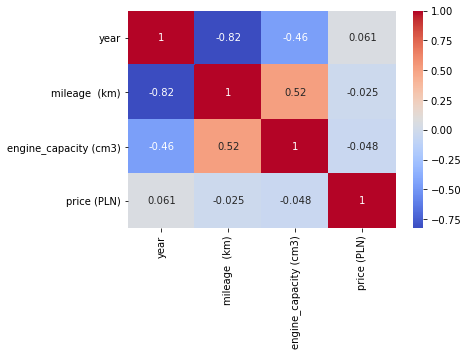

In [16]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'mileage  (km)'}>],
       [<AxesSubplot:title={'center':'engine_capacity (cm3)'}>,
        <AxesSubplot:title={'center':'price (PLN)'}>]], dtype=object)

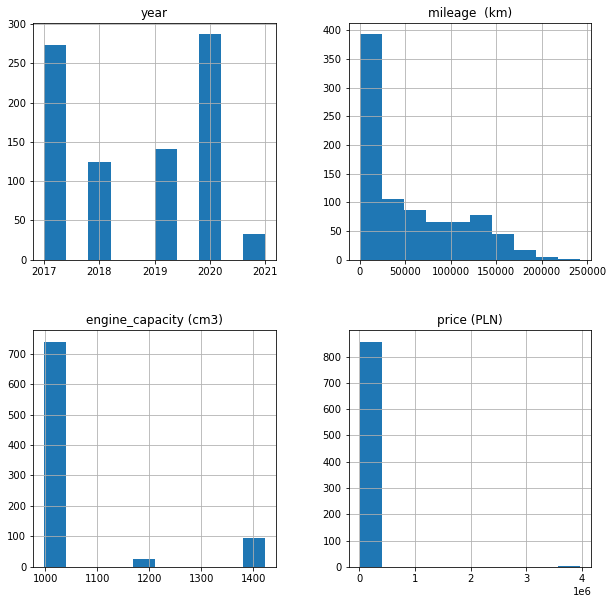

In [24]:
data.hist(figsize=(10,10))

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='mileage  (km)', ylabel='year'>,
        <AxesSubplot:xlabel='engine_capacity (cm3)', ylabel='year'>,
        <AxesSubplot:xlabel='price (PLN)', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='mileage  (km)'>,
        <AxesSubplot:xlabel='mileage  (km)', ylabel='mileage  (km)'>,
        <AxesSubplot:xlabel='engine_capacity (cm3)', ylabel='mileage  (km)'>,
        <AxesSubplot:xlabel='price (PLN)', ylabel='mileage  (km)'>],
       [<AxesSubplot:xlabel='year', ylabel='engine_capacity (cm3)'>,
        <AxesSubplot:xlabel='mileage  (km)', ylabel='engine_capacity (cm3)'>,
        <AxesSubplot:xlabel='engine_capacity (cm3)', ylabel='engine_capacity (cm3)'>,
        <AxesSubplot:xlabel='price (PLN)', ylabel='engine_capacity (cm3)'>],
       [<AxesSubplot:xlabel='year', ylabel='price (PLN)'>,
        <AxesSubplot:xlabel='mileage  (km)', ylabel='price (PLN)'>,
        <AxesSubplot:xlabel='engine_capacit

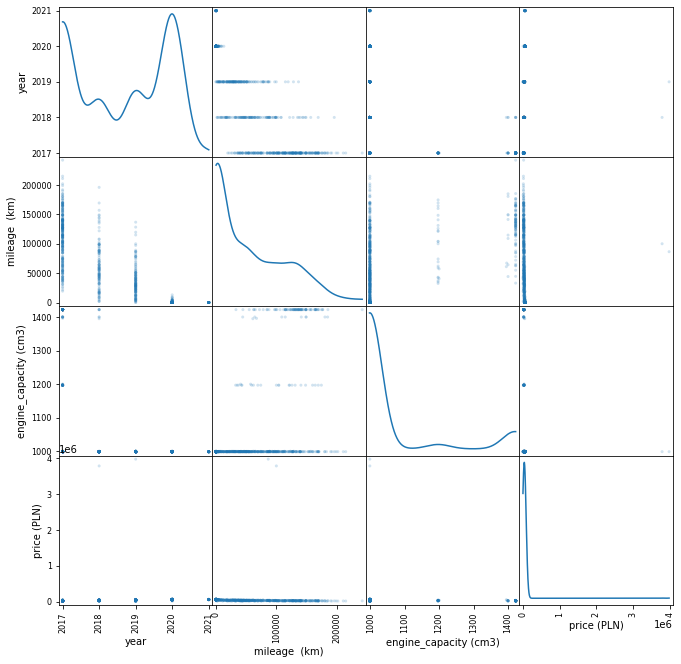

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(11, 11), diagonal='kde')

<AxesSubplot:>

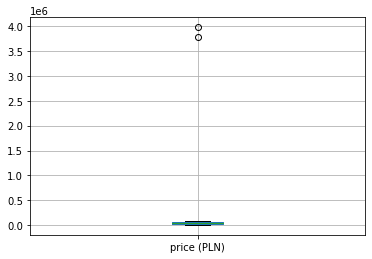

In [23]:
data.boxplot(column='price (PLN)',)

#probably need to filter out data

In [56]:
pln = data['price (PLN)']
pln_filtered = pln.where((pln > 20000) & (pln < 100000))
l2p = pln_filtered.dropna().unique().tolist()
l2p

[35900.0,
 57900.0,
 46000.0,
 61350.0,
 28000.0,
 42075.0,
 57350.0,
 72990.0,
 79990.0,
 74590.0,
 68890.0,
 67990.0,
 34999.0,
 47368.0,
 60200.0,
 59850.0,
 32000.0,
 29900.0,
 59900.0,
 29500.0,
 30000.0,
 32900.0,
 29000.0,
 31500.0,
 53997.0,
 58300.0,
 28002.0,
 24002.0,
 25999.0,
 49500.0,
 28900.0,
 27900.0,
 32999.0,
 43900.0,
 61700.0,
 60500.0,
 59200.0,
 52800.0,
 58000.0,
 55800.0,
 48900.0,
 57750.0,
 56000.0,
 54850.0,
 57400.0,
 56800.0,
 28700.0,
 48999.0,
 57700.0,
 62750.0,
 62400.0,
 59150.0,
 42900.0,
 60850.0,
 46900.0,
 33900.0,
 31900.0,
 58500.0,
 39999.0,
 33002.0,
 40900.0,
 65700.0,
 27700.0,
 37900.0,
 53900.0,
 53490.0,
 58750.0,
 36500.0,
 52400.0,
 23499.0,
 41986.0,
 55900.0,
 58850.0,
 37999.0,
 55300.0,
 62850.0,
 47850.0,
 62700.0,
 37500.0,
 27000.0,
 64900.0,
 32850.0,
 54900.0,
 52700.0,
 49250.0,
 44990.0,
 26800.0,
 57500.0,
 51500.0,
 47900.0,
 26999.0,
 55500.0,
 34900.0,
 62900.0,
 36900.0,
 26900.0,
 49900.0,
 34075.0,
 37075.0,
 38000.0,


Text(0.5, 1.0, 'Histogram')

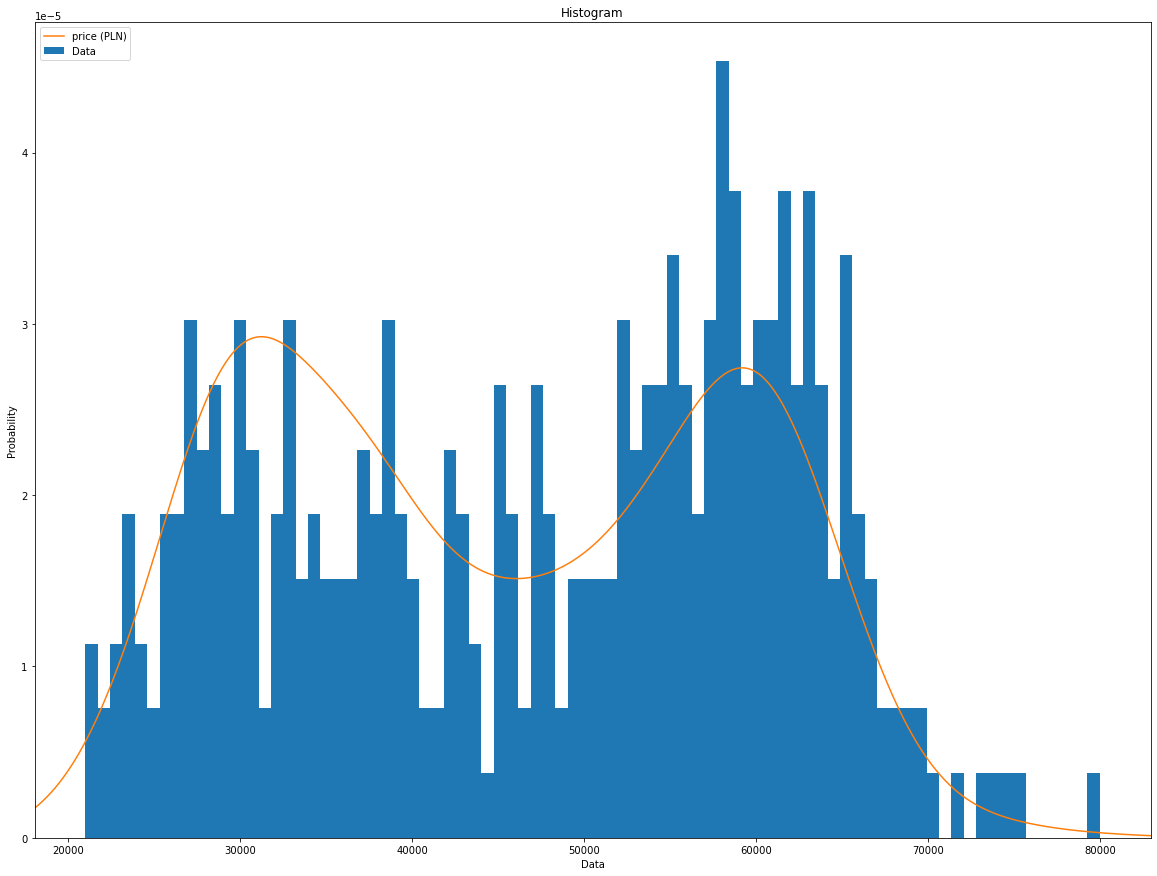

In [76]:

plt.figure(figsize=(20,15))
plt.hist(l2p, density=True, bins=82, label="Data")
mn, mx = plt.xlim()
plt.xlim(mn, mx)
pln_filtered.plot.kde()
plt.legend(loc="upper left")
plt.ylabel('Probability')
plt.xlabel('Data')
plt.title("Histogram")

<AxesSubplot:ylabel='Density'>

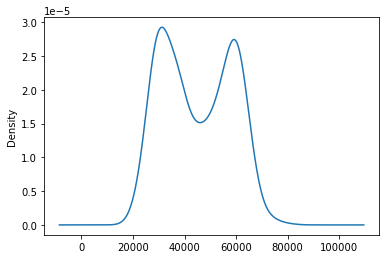

In [57]:
pln_filtered.plot.kde()

<AxesSubplot:>

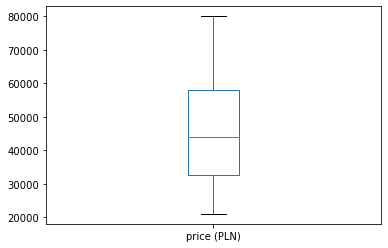

In [69]:
pln_filtered.plot.box()